<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/jupyter.png" width=400 height=400 />

### Access to terminal using !

In [1]:
!pwd

/home/fusion/jupyterhub-notebooks/Cornell_PB_NE_Hub/data/raw


<hr />

### Cell magic %%js helps to write Javascript code 

In [2]:
%%js
alert("Welcome to JupyterHub Demo - Javascript example") 

<IPython.core.display.Javascript object>

### Cell magic %%html interprets the code as HTML

In [3]:
%%html
<p style="color:blue">Hello</p>

<hr />

### Kernels can be changed (but only one works for a notebook)

### Cells can be added above or below any other cell

### Any cell can be convered to Markdown

### Notebook can be shared as an example and later moved to reviewed published notebooks

<hr />

### Installing a Python Package through terminal

In [4]:
!pip install pandas -q

### Installing a Python Package from within Python

In [6]:
import pip
pip.main(["install","pandas"])

<hr />

## Hive Example

### Create Hive Context

In [5]:
from pyspark import SparkContext,HiveContext,SparkConf
conf = (SparkConf()
           .setAppName("sql_magic")) #your name instead of sql_magic
sc = SparkContext(conf=conf)
hiveContext = HiveContext(sc)

### Install sql_magic

In [6]:
!pip install sql_magic -q

### Load sql_magic

In [7]:
%load_ext sql_magic

/opt/conda/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [8]:
%config SQL.conn_name = 'hiveContext'

### Hive Queries can be executed

In [12]:
%%read_sql tables
select * from facility_trend limit 10

Query started at 01:23:14 PM UTC; Query executed in 0.14 m

,facilityname,inductscandate,cnt
0,ATL3,07/11/2017,12479
1,ATL3,06/06/2018,14981
2,IND2,06/09/2017,793
3,ORD2,05/31/2017,10
4,LAX6,10/13/2017,5078
5,IND2,10/20/2017,13386
6,RNO2,12/07/2017,11934
7,IND2,10/28/2017,1867
8,RNO2,02/19/2018,7907
9,ATL3,02/22/2018,10291


In [14]:
type(tables)

pandas.core.frame.DataFrame

In [15]:
sc.stop()

<hr />

## pySpark Example (Import data from S3)

In [13]:
from pyspark import SparkConf, SparkContext
conf = (SparkConf()
         .setMaster("yarn-client")
         .setAppName("Shaleen") ## use your name here for the purpose of debugging
         .set("spark.executor.memory", "2g")
       )
sc = SparkContext(conf = conf)
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [14]:
df = sqlContext.read.format("com.databricks.spark.csv")        \
        .options(delimiter='|', header = True, inferSchema = True)  \
        .load('<input_s3_location>') ## Access data from shared bucket
df.printSchema()

In [15]:
df.show(5)

In [16]:
sc.stop()

<hr />

## R Examples (Package Installation)

### Change Kernel to R

In [1]:
head(cars)  # display the first 6 observations

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


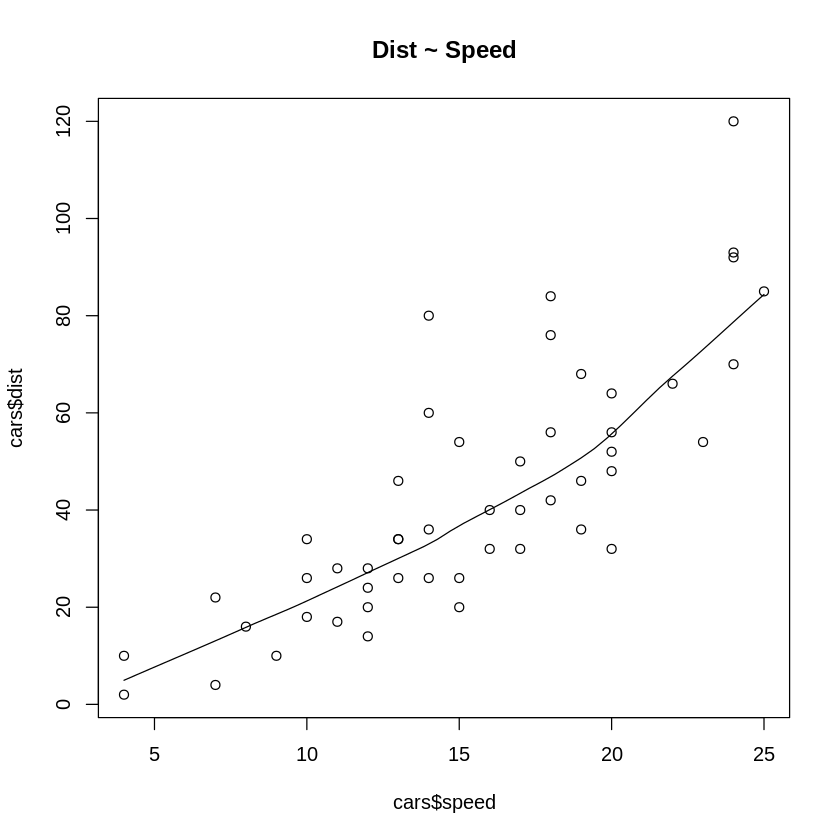

In [2]:
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist ~ Speed", )  # scatterplot

<hr />

## Maps using ipyleaflet

In [4]:
!pip install ipyleaflet -q

In [5]:
!jupyter nbextension install --py --symlink --sys-prefix ipyleaflet
!jupyter nbextension enable --py --sys-prefix ipyleaflet  # can be skipped for notebook 5.3 and above

Installing /opt/conda/lib/python3.6/site-packages/ipyleaflet/static -> jupyter-leaflet
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable ipyleaflet --py --sys-prefix
    
Enabling notebook extension jupyter-leaflet/extension...
      - Validating: OK


In [6]:
from ipyleaflet import Map, basemaps, basemap_to_tiles

m = Map(
    layers=(basemap_to_tiles(basemaps.OpenStreetMap.Mapnik, "2017-04-08"), ),
    center=(37.0902, -95.7129),
    zoom=6
)

m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[37.0902, -95.7129], layers=(TileLayer(max_zoom=19, min_zoom=1, name='OpenStreetMap.Mapnik', options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']),), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'interpolation', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=6)

<hr />

## Bokeh Plots

In [1]:
!pip install bokeh -q

In [2]:
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show

In [3]:
output_notebook()

Loading BokehJS ...

In [5]:
from numpy import cos, linspace
x = linspace(-6, 6, 100)
y = cos(x)

p = figure(width=500, height=500)
p.circle(x, y, size=7, color="firebrick", alpha=0.5)
show(p)

<hr />

## Matplotlib plots

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [9]:
fig, ax = plt.subplots()
np.random.seed(0)
ax.plot(np.random.normal(size=100),
        np.random.normal(size=100),
        'or', ms=10, alpha=0.3)
ax.plot(np.random.normal(size=100),
        np.random.normal(size=100),
        'ob', ms=20, alpha=0.1)

ax.set_xlabel('this is x')
ax.set_ylabel('this is y')
ax.set_title('Matplotlib Plot Rendered in D3!', size=14)
ax.grid(color='lightgray', alpha=0.7)

<hr />

## Display Images

In [10]:
from IPython.display import Image
Image(url='http://www.blackice.com/images/RGB_Cube.jpg')

<hr />

<hr />

## Writing data to S3

### Change Kernel to Python 2 (EMR has python2 on all nodes)

### Download Data to local container

In [6]:
!wget http://insight.dev.schoolwires.com/HelpAssets/C2Assets/C2Files/C2ImportCalEventSample.csv

--2018-12-04 13:29:59--  http://insight.dev.schoolwires.com/HelpAssets/C2Assets/C2Files/C2ImportCalEventSample.csv
Resolving insight.dev.schoolwires.com (insight.dev.schoolwires.com)... 52.22.245.195, 34.206.140.97
Connecting to insight.dev.schoolwires.com (insight.dev.schoolwires.com)|52.22.245.195|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 545 [application/octet-stream]
Saving to: ‘C2ImportCalEventSample.csv’

C2ImportCalEventSam 100%[===================>]     545  --.-KB/s    in 0s      

2018-12-04 13:30:00 (71.4 MB/s) - ‘C2ImportCalEventSample.csv’ saved [545/545]



### Read data in python

In [7]:
import pandas as pd
data = pd.read_csv("C2ImportCalEventSample.csv")

### Create Spark Content

In [8]:
from pyspark import SparkConf, SparkContext
conf = (SparkConf()
         .setMaster("yarn-client")
         .setAppName("Shaleen") ## use your name here for debugging purpose
         .set("spark.executor.memory", "2g")
       )
sc = SparkContext(conf = conf)
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [9]:
for col in data:
    data[str(col)] = data[str(col)].astype(str)

### Set Private Keys for AWS (To access private bucket)

In [4]:
sc._jsc.hadoopConfiguration().set("fs.s3n.awsAccessKeyId", '<your_aws_access_key>')
sc._jsc.hadoopConfiguration().set("fs.s3n.awsSecretAccessKey", '<your_aws_secret_access_key>')

### Convert pandas to Spark DF and write to S3 location

In [5]:
data_df=sqlContext.createDataFrame(data.reset_index(drop=False))
data_df.write.save("<your_s3_location>", format='csv', header=True)

### Install AWS CLI

In [6]:
!pip install awscli -q

### Set aws credentials to access private bucket

In [7]:
!mkdir -p ~/.aws
!rm ~/.aws/config
!echo '[default]' >> ~/.aws/config 
!echo 'AWS_ACCESS_KEY_ID=<your_aws_access_key>' >> ~/.aws/config 
!echo 'AWS_SECRET_ACCESS_KEY=<your_aws_secret_access_key>' >> ~/.aws/config
!echo 'AWS_DEFAULT_REGION=us-west-2a' >> ~/.aws/config

### List bucket contents

In [9]:
!aws s3 ls <your_s3_location>